In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#importing the dataset and extracting the independent and dependent variables
companies = pd.read_csv('1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

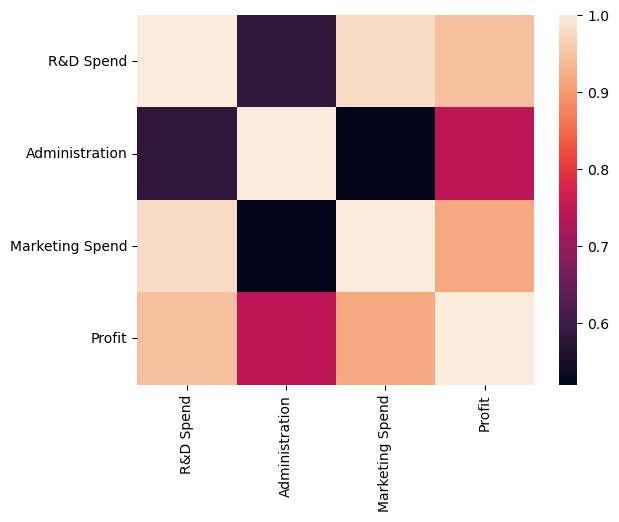

In [46]:
#Data visualisation
#Building the correlation matrix
sns.heatmap(companies.corr())

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer to one-hot encode the 4th column (index 3)
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'
)

X = column_transformer.fit_transform(X)

In [50]:
X = X[:,1:]

In [53]:
#Splitting the dataset into the Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [54]:
#Fitting Multiple Linear Regression to the LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
#Predicting the Test Set results
y_pred = regressor.predict(X_test)
print(y_pred)

[ 89790.61532915  88427.0718736   94894.67836971 175680.86725612
  83411.73042088 110571.90200074 132145.2293644   91473.37719686
 164597.05380607  53222.826674    66950.19050989 150566.43987005
 126915.20858596  59337.85971049 177513.91053063  75316.2814305
 118248.14406603 164574.40699903 170937.2898107  182069.11645085
 118845.03252688  85669.95112228 180992.59396145  84145.08220144
 105005.83769214 101233.56772746  53831.07669089  56881.41475223
  68896.39346904 210040.00765885 120778.72270894 111724.87157654
 101487.90541517 137959.02649624  63969.95996742 108857.91214126
 186014.72531989 171442.64130748 174644.26529206 117671.49128195
  96731.37857433 165452.2577941  107724.34331255  50194.54176912
 116513.89532179  58632.48986819 158416.4682761   78541.48521609
 159727.66671744 131137.87699644 184880.70924517 174609.08266881
  93745.66352058  78341.13383417 180745.90439081  84461.61490551
 142900.90602903 170618.44098398  84365.09530838 105307.3716218
 141660.07290787  52527.343

In [58]:
#Calculating the Coefficients
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [59]:
#Calculating the Intercept
print(regressor.intercept_)

-51035.2297240436


In [61]:
#Calculating the R sqpared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268862